In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')


['heart.csv', 'PD_12.ipynb', 'PD_12.md']


In [129]:
dataset = pd.read_csv("heart.csv")

In [130]:
type(dataset)

pandas.core.frame.DataFrame

In [131]:
dataset.shape

(294, 14)

In [132]:
# cleans the names of the columns from any whitespaces
for col in dataset.columns:
    new_col_name = col.strip()
    dataset.rename(columns={col: new_col_name}, inplace=True)

In [133]:
for col in ['slope', 'ca', 'thal']:
    print(dataset[col].value_counts())

?    190
2     91
1     12
3      1
Name: slope, dtype: int64
?    291
0      3
Name: ca, dtype: int64
?    266
7     11
6     10
3      7
Name: thal, dtype: int64


In [134]:
dataset = dataset.drop(labels=['slope', 'ca', 'thal'], axis='columns')
dataset.head(5)
df_filled_avg = dataset

In [135]:
for col in dataset.columns:

    if '?' in dataset[col].unique():
        # print(col, dataset[col].value_counts()['?'])
        dataset = dataset[dataset[col] != '?']

        if col == 'chol':
            df_filled_avg.loc[df_filled_avg['chol'] == '?'] = -1
        else:
            df_filled_avg = df_filled_avg[df_filled_avg[col] != '?']

    dataset[col] = dataset[col].astype('float')
    df_filled_avg[col] = df_filled_avg[col].astype('float')
    

df_filled_avg.loc[df_filled_avg['chol'] == -1] = df_filled_avg['chol'].mean()

print(dataset.shape)
print(dataset.dtypes)
print(df_filled_avg.shape)
print(df_filled_avg.dtypes)



(261, 11)
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
num         float64
dtype: object
(284, 11)
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
num         float64
dtype: object


In [136]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       261 non-null    float64
 1   sex       261 non-null    float64
 2   cp        261 non-null    float64
 3   trestbps  261 non-null    float64
 4   chol      261 non-null    float64
 5   fbs       261 non-null    float64
 6   restecg   261 non-null    float64
 7   thalach   261 non-null    float64
 8   exang     261 non-null    float64
 9   oldpeak   261 non-null    float64
 10  num       261 non-null    float64
dtypes: float64(11)
memory usage: 24.5 KB


In [137]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest"]

for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest


In [138]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28.0,1.0,2.0,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0.0
1,29.0,1.0,2.0,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0.0
3,30.0,0.0,1.0,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0.0
4,31.0,0.0,2.0,100.0,219.0,0.0,1.0,150.0,0.0,0.0,0.0
5,32.0,0.0,2.0,105.0,198.0,0.0,0.0,165.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Male (1) vs Female (0) affected by Heart Diseases')

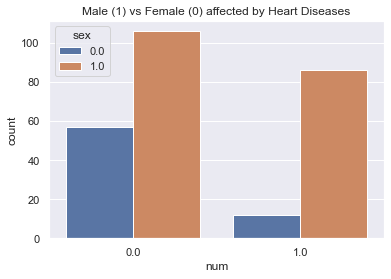

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x = 'num',data = dataset,hue = 'sex')
plt.title("Male (1) vs Female (0) affected by Heart Diseases")

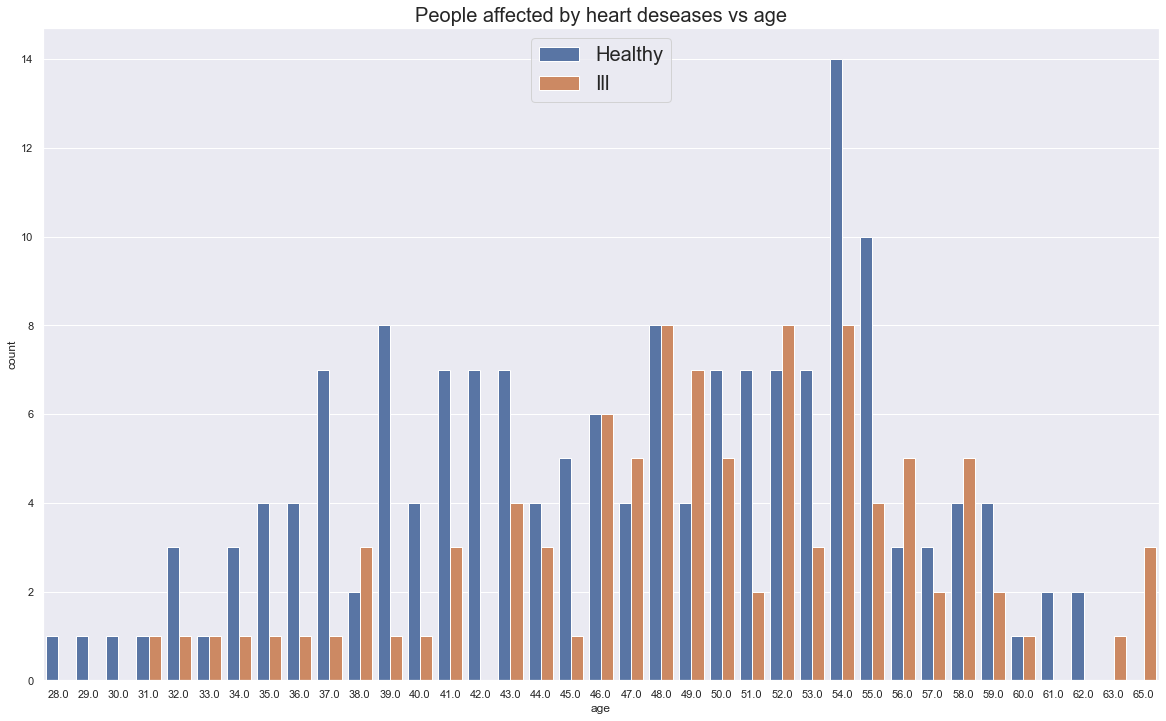

In [140]:
plt.figure(figsize = (20,12))
sns.countplot(x = 'age',hue = 'num',data = dataset)
plt.title("People affected by heart deseases vs age", fontsize=20)
plt.legend(["Healthy","Ill"], fontsize=20)

Text(0.5, 1.0, 'Heart rate vs Age')

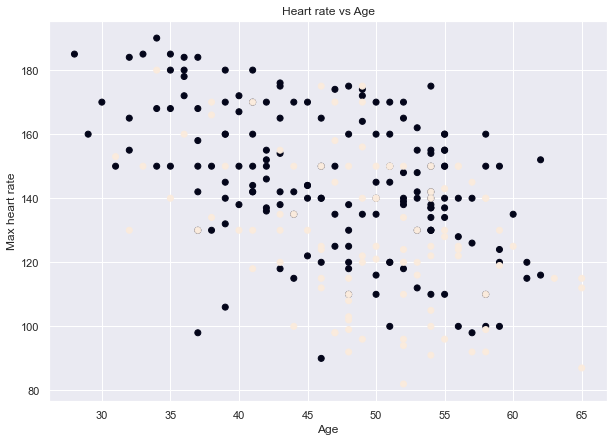

In [141]:
plt.figure(figsize = (10,7))
plt.scatter(x = 'age',y = 'thalach', c='num',data = dataset)
plt.xlabel('Age')
plt.ylabel('Max heart rate')
plt.title('Heart rate vs Age')

In [142]:
print(dataset.corr()['num'].abs().sort_values(ascending=False))

num         1.000000
oldpeak     0.565669
exang       0.557860
cp          0.503254
thalach     0.345074
sex         0.249531
chol        0.217929
fbs         0.178642
age         0.160249
trestbps    0.148295
restecg     0.019413
Name: num, dtype: float64


0.0    163
1.0     98
Name: num, dtype: int64


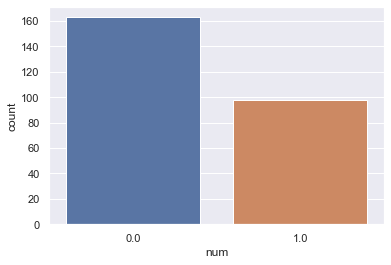

In [143]:
y = dataset['num']

sns.countplot(y)

target_temp = dataset['num'].value_counts()

print(target_temp)

In [144]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/dataset.shape[0],2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/dataset.shape[0],2)))

Percentage of patience without heart problems: 62.45
Percentage of patience with heart problems: 37.55


In [145]:
from sklearn.model_selection import train_test_split

X = dataset.drop(['num'], axis = 1).values
Y = dataset['num']

X = StandardScaler().fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 101)
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [146]:
X_train.shape

(182, 10)

In [147]:
X_test.shape

(79, 10)

In [148]:
Y_train.shape

(182,)

In [149]:
Y_test.shape

(79,)

In [150]:
def learning_rate_cv_plot(data_dm,params,lr_array, n_boost_rounds):
    plt.figure(figsize=(15, 10))
    legend = []
    colors = ('r','g','b','c','m','y')
    for lr in lr_array:
        params["learning_rate"] = lr
        cv_results = xgb.cv(dtrain=data_dm, params=params, nfold=3, num_boost_round=n_boost_rounds,
                                    metrics="rmse", as_pandas=True, seed=123)
        plt.plot(cv_results['train-rmse-mean'], color=colors[lr_array.index(lr)])
        plt.plot(cv_results['test-rmse-mean'], ls='dashed', color=colors[lr_array.index(lr)])
   
        legend.append(f'test  LR: {lr}')
        legend.append(f'train LR: {lr}')
    plt.legend(legend)
    plt.xlabel("Liczba estymatorów")
    plt.ylabel("Bład estymacji")

Accuracy:  73.42 %


<Figure size 1080x576 with 0 Axes>

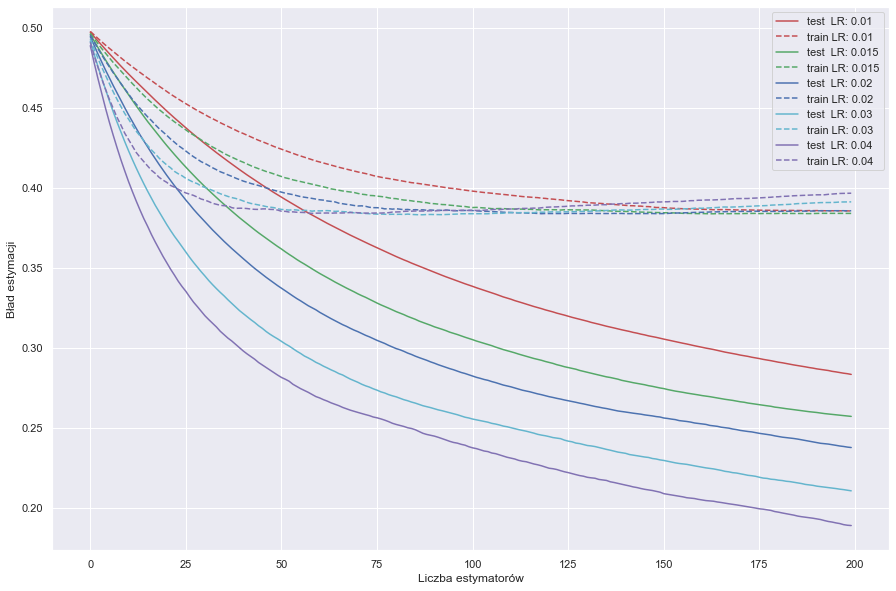

In [151]:
from xgboost import XGBClassifier
from xgboost import plot_tree
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost.callback import TrainingCallback

lr_array = [0.01, 0.015, 0.02, 0.03, 0.04]
data_dm = xgb.DMatrix(data=X, label=Y.values)
plt.figure(figsize=(15, 8))

params = {"objective":"reg:squarederror", "max_depth":3, "learning_rate": 0.1}

data_train_dm = xgb.DMatrix(data=X_train, label=Y_train.values)
data_test_dm = xgb.DMatrix(data=X_test, label=Y_test.values)
learning_rate_cv_plot(data_dm, params, lr_array, 200)

final_params = {"objective":"reg:squarederror", "max_depth":3, "learning_rate": 0.04}

model = xgb.train(
    dtrain=data_train_dm,
    params=final_params,
    num_boost_round=75,
    )

predictions = model.predict(data_test_dm)
pred_classes = []
for p in predictions:
    if p < 0.5:
        pred_classes.append(0)
    else:
        pred_classes.append(1)

score_xgb = round(accuracy_score(pred_classes,Y_test)*100,2)        

print("Accuracy: ", round(accuracy_score(pred_classes,Y_test)*100,2), "%")
# for lr in lr_array:
#     params["learning_rate"] = lr
#     cv_results = xgb.cv(
#         nfold=3,
#         dtrain=data_dm, 
#         params=params, 
#         num_boost_round=50, 
#         metrics="rmse", 
#         as_pandas=True, 
#         seed=123,
#     )
#     plt.plot(cv_results['train-rmse-mean'])
#     plt.plot(cv_results['test-rmse-mean'])

# plt.xlabel("Liczba estymatorów")
# plt.ylabel("Bład estymacji")
# plt.legend(lr_array)
# plt.show()

KNN

In [152]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [153]:
Y_pred_knn.shape

(79,)

In [154]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 78.48 %


In [155]:
train_scores = []
test_scores  = []

# Create a list of a different values for n_neighbors
neighbors = range(1,25)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train,Y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train,Y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test,Y_test))

In [156]:
train_scores

[1.0,
 0.8901098901098901,
 0.9120879120879121,
 0.9010989010989011,
 0.8846153846153846,
 0.8516483516483516,
 0.8626373626373627,
 0.8516483516483516,
 0.8406593406593407,
 0.8131868131868132,
 0.8351648351648352,
 0.8241758241758241,
 0.8186813186813187,
 0.8296703296703297,
 0.8296703296703297,
 0.8186813186813187,
 0.8296703296703297,
 0.8186813186813187,
 0.8076923076923077,
 0.8076923076923077,
 0.8131868131868132,
 0.8131868131868132,
 0.8241758241758241,
 0.8186813186813187]

In [157]:
test_scores

[0.6835443037974683,
 0.7721518987341772,
 0.7088607594936709,
 0.759493670886076,
 0.7468354430379747,
 0.759493670886076,
 0.7848101265822784,
 0.810126582278481,
 0.7721518987341772,
 0.7848101265822784,
 0.7848101265822784,
 0.8227848101265823,
 0.7848101265822784,
 0.8227848101265823,
 0.7848101265822784,
 0.810126582278481,
 0.810126582278481,
 0.8354430379746836,
 0.810126582278481,
 0.810126582278481,
 0.810126582278481,
 0.7974683544303798,
 0.7974683544303798,
 0.7974683544303798]

Maximum KNN Score on the test data: 83.54%


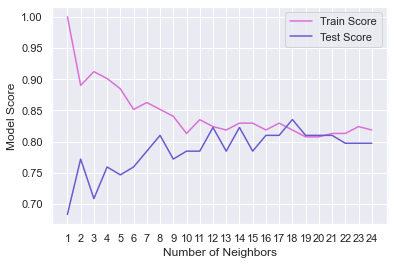

In [158]:
plt.plot(neighbors,train_scores,label='Train Score',color='orchid')
plt.plot(neighbors,test_scores,label='Test Score',color='slateblue')
plt.xlabel('Number of Neighbors')
plt.ylabel('Model Score')
plt.xticks(np.arange(1,25,1))
plt.legend();
print(f'Maximum KNN Score on the test data: {max(test_scores)*100:.2f}%')

NEURAL NETWORK

In [159]:

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=10))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [160]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
6/6 [==============================] - 0s 1ms/step - loss: 0.8587 - accuracy: 0.4505
Epoch 2/300
6/6 [==============================] - 0s 1ms/step - loss: 0.8337 - accuracy: 0.4560
Epoch 3/300
6/6 [==============================] - 0s 1ms/step - loss: 0.8101 - accuracy: 0.4615
Epoch 4/300
6/6 [==============================] - 0s 1ms/step - loss: 0.7873 - accuracy: 0.5000
Epoch 5/300
6/6 [==============================] - 0s 1ms/step - loss: 0.7657 - accuracy: 0.5110
Epoch 6/300
6/6 [==============================] - 0s 1ms/step - loss: 0.7476 - accuracy: 0.5275
Epoch 7/300
6/6 [==============================] - 0s 2ms/step - loss: 0.7285 - accuracy: 0.5604
Epoch 8/300
6/6 [==============================] - 0s 1ms/step - loss: 0.7095 - accuracy: 0.5824
Epoch 9/300
6/6 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5934
Epoch 10/300
6/6 [==============================] - 0s 2ms/step - loss: 0.6775 - accuracy: 0.6099
Epoch 11/300
6/6 [===========

In [161]:
Y_pred_nn = model.predict(X_test)

In [162]:
Y_pred_nn.shape

(79, 1)

In [163]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [164]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

The accuracy score achieved using Neural Network is: 73.42 %


In [165]:
scores = [score_knn, score_xgb ,score_nn]
algorithms = ["K-Nearest Neighbors","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using K-Nearest Neighbors is: 78.48 %
The accuracy score achieved using XGBoost is: 73.42 %
The accuracy score achieved using Neural Network is: 73.42 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

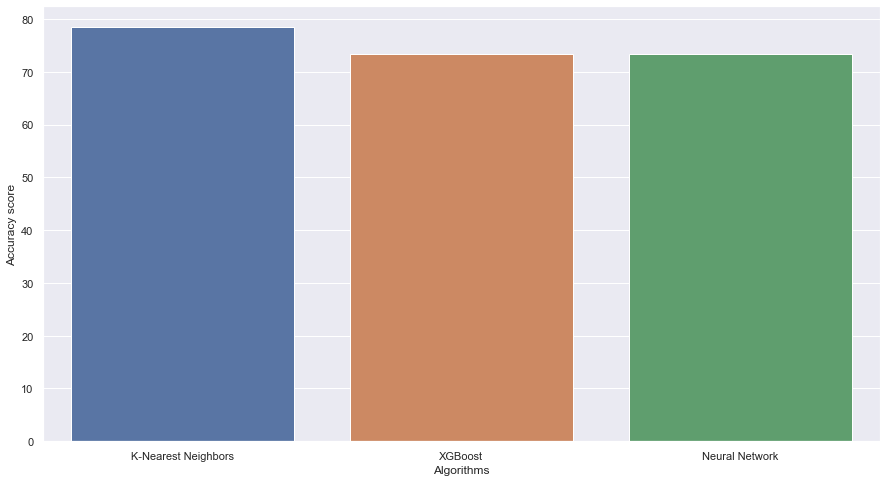

In [166]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)